In [12]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

In [13]:
x_train[1]

[1,
 194,
 2,
 194,
 2,
 78,
 228,
 5,
 6,
 2,
 2,
 2,
 134,
 26,
 4,
 715,
 8,
 118,
 2,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 2,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2,
 2,
 5,
 647,
 4,
 116,
 9,
 35,
 2,
 4,
 229,
 9,
 340,
 2,
 4,
 118,
 9,
 4,
 130,
 2,
 19,
 4,
 2,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 2,
 2,
 398,
 4,
 2,
 26,
 2,
 5,
 163,
 11,
 2,
 2,
 4,
 2,
 9,
 194,
 775,
 7,
 2,
 2,
 349,
 2,
 148,
 605,
 2,
 2,
 15,
 123,
 125,
 68,
 2,
 2,
 15,
 349,
 165,
 2,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 2,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 2,
 228,
 2,
 5,
 2,
 656,
 245,
 2,
 5,
 4,
 2,
 131,
 152,
 491,
 18,
 2,
 32,
 2,
 2,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 2,
 9,
 8,
 168,
 145,
 23,
 4,
 2,
 15,
 16,
 4,
 2,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 285,
 16,
 145,
 95]

In [106]:
import keras

padded_x_train = pad_sequences(
    x_train,
    maxlen=200,
)

padded_x_test = pad_sequences(
    x_test,
    maxlen=200,
)

In [3]:
# padded_x_train = np.asarray(padded_x_train)
# padded_x_test = np.asarray(padded_x_test)

In [155]:
model = Sequential()

In [156]:
model.add(Dense(64, input_shape=(200,)))
model.add(Dense(16, input_shape=(64, )))
model.add(Dense(1, activation='sigmoid'))

In [157]:
model.compile(
    # loss=keras.losses.BinaryCrossentropy(),
    loss='binary_crossentropy',
    optimizer='adam',
    metrics="accuracy"
)

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                12864     
                                                                 
 dense_44 (Dense)            (None, 16)                1040      
                                                                 
 dense_45 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13921 (54.38 KB)
Trainable params: 13921 (54.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [158]:
import tensorflow as tf

padded_x_train = tf.convert_to_tensor(padded_x_train)
padded_x_test = tf.convert_to_tensor(padded_x_test)

In [42]:
# padded_x_train = padded_x_train.reshape(padded_x_train.shape[0],padded_x_train.shape[1],1)
# padded_x_test = padded_x_test.reshape(padded_x_test.shape[0],padded_x_test.shape[1],1)

In [43]:
# y_train = tf.convert_to_tensor(y_train)
# y_test = tf.convert_to_tensor(y_test)

In [159]:
import numpy as np

history = model.fit(padded_x_train, y_train,
                    epochs=5, verbose=1, validation_data=(padded_x_test, y_test))

Epoch 1/5
782/782 [==============================] - 3s 2ms/step - loss: 19.1106 - accuracy: 0.4988 - val_loss: 4.8453 - val_accuracy: 0.5000
Epoch 2/5
782/782 [==============================] - 1s 2ms/step - loss: 3.8649 - accuracy: 0.4986 - val_loss: 2.6913 - val_accuracy: 0.5028
Epoch 3/5
782/782 [==============================] - 1s 2ms/step - loss: 2.6320 - accuracy: 0.5033 - val_loss: 2.5330 - val_accuracy: 0.4959
Epoch 4/5
782/782 [==============================] - 1s 2ms/step - loss: 2.2880 - accuracy: 0.5046 - val_loss: 2.8737 - val_accuracy: 0.4973
Epoch 5/5
782/782 [==============================] - 1s 2ms/step - loss: 2.0999 - accuracy: 0.5032 - val_loss: 1.9548 - val_accuracy: 0.4904


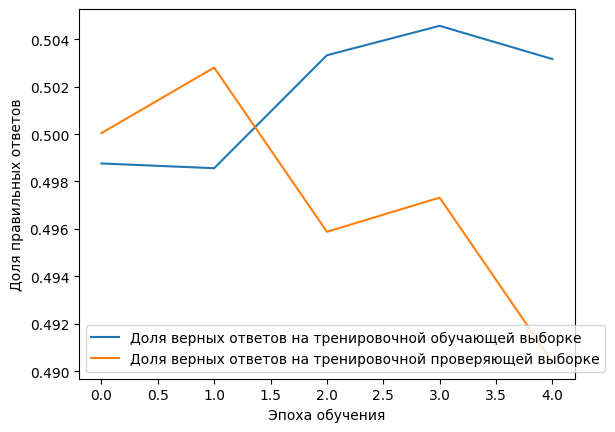

In [160]:
plt.plot(history.history['accuracy'], label='Доля верных ответов на тренировочной обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на тренировочной проверяющей выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

In [180]:
preds_weights = model.predict(padded_x_test)
y_pred = (preds_weights > 0.5).astype('int32')
print(y_pred)

782/782 [==============================] - 1s 769us/step
[[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [181]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.4904

In [ ]:
from keras.src.layers import Embedding, SimpleRNN

model_new = Sequential()

model_new.add(Embedding(1000, 8, input_length=200))
model_new.add(SimpleRNN(8))
model_new.add(Dense(1, activation='sigmoid'))

model_new.compile(
    # loss=keras.losses.BinaryCrossentropy(),
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=["accuracy"]
)

model_new.summary()

In [ ]:
history_ = model_new.fit(padded_x_train, y_train,
                    epochs=5, verbose=1, validation_data=(padded_x_test, y_test))

In [176]:
preds_weights_ = model_new.predict(padded_x_test)
y_pred_ = (preds_weights_ > 0.5).astype('int32')


782/782 [==============================] - 4s 5ms/step
[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]


In [179]:
accuracy_score(y_pred_, y_test)

0.7594

In [167]:
history_new = model_new.fit(padded_x_train, y_train,
                            epochs=5, verbose=1, validation_data=(padded_x_test, y_test))

Epoch 1/5
782/782 [==============================] - 20s 24ms/step - loss: 0.6922 - accuracy: 0.5198 - val_loss: 0.6899 - val_accuracy: 0.5324
Epoch 2/5
782/782 [==============================] - 23s 29ms/step - loss: 0.6788 - accuracy: 0.5682 - val_loss: 0.6824 - val_accuracy: 0.5414
Epoch 3/5
782/782 [==============================] - 24s 30ms/step - loss: 0.6582 - accuracy: 0.5955 - val_loss: 0.6746 - val_accuracy: 0.5582
Epoch 4/5
782/782 [==============================] - 27s 34ms/step - loss: 0.6421 - accuracy: 0.6183 - val_loss: 0.6712 - val_accuracy: 0.5680
Epoch 5/5
782/782 [==============================] - 27s 34ms/step - loss: 0.6313 - accuracy: 0.6286 - val_loss: 0.6670 - val_accuracy: 0.5769


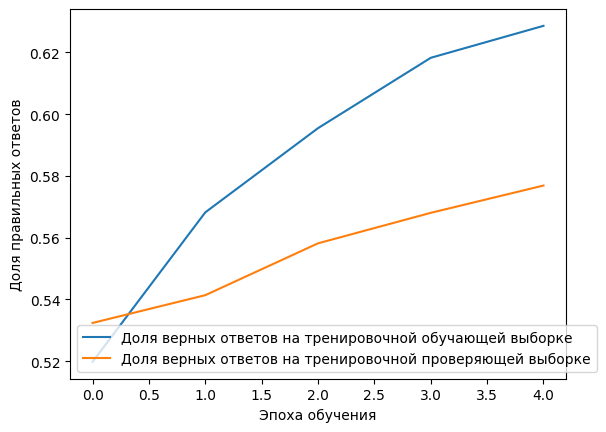

In [168]:
plt.plot(history_new.history['accuracy'], label='Доля верных ответов на тренировочной обучающей выборке')
plt.plot(history_new.history['val_accuracy'], label='Доля верных ответов на тренировочной проверяющей выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

In [184]:
max_words = [1000, 2000]
max_len = [500, 1000]

In [186]:
for i in max_words:
    (x_train_, y_train_), (x_test_, y_test_) = imdb.load_data(num_words=i)
    for j in max_len:
        padded_x_train_ = pad_sequences(
            x_train_,
            maxlen=j,
        )

        padded_x_test_ = pad_sequences(
            x_test_,
            maxlen=j,
        )
        model_new_ = Sequential()
        model_new_.add(Embedding(i, 2, input_length=j))
        model_new_.add(SimpleRNN(2, activation='relu'))
        model_new_.add(Dense(1, activation='sigmoid'))

        model_new_.compile(
            # loss=keras.losses.BinaryCrossentropy(),
            loss='binary_crossentropy',
            optimizer='adam',
            metrics=["accuracy"]
        )

        history_new_ = model_new_.fit(padded_x_train_, y_train_,
                            epochs=5, verbose=1, validation_data=(padded_x_test_, y_test_))
        preds_weights__ = model_new_.predict(padded_x_test_)
        y_pred__ = (preds_weights__ > 0.5).astype('int32')

        print(f"model – max_words: {i} – max_len: {j} acc: {accuracy_score(y_test_, y_pred__)}")

Epoch 1/5
782/782 [==============================] - 52s 65ms/step - loss: 0.6926 - accuracy: 0.5106 - val_loss: 0.6917 - val_accuracy: 0.5236
Epoch 2/5
782/782 [==============================] - 49s 63ms/step - loss: 0.6895 - accuracy: 0.5354 - val_loss: 0.6871 - val_accuracy: 0.5308
Epoch 3/5
782/782 [==============================] - 48s 61ms/step - loss: 0.6802 - accuracy: 0.5413 - val_loss: 0.6752 - val_accuracy: 0.5322
Epoch 4/5
782/782 [==============================] - 46s 58ms/step - loss: 0.6510 - accuracy: 0.5997 - val_loss: 0.6335 - val_accuracy: 0.6341
Epoch 5/5
782/782 [==============================] - 8s 10ms/step
model – max_words: 1000 – max_len: 500 acc: 0.76052
Epoch 1/5
782/782 [==============================] - 94s 119ms/step - loss: 0.6913 - accuracy: 0.5287 - val_loss: 0.6880 - val_accuracy: 0.5490
Epoch 2/5
782/782 [==============================] - 99s 127ms/step - loss: 0.6762 - accuracy: 0.5744 - val_loss: 0.6725 - val_accuracy: 0.5702
Epoch 3/5
782/782 [===

KeyboardInterrupt: 